# Linear production varying productive capacity and tech constant

The experiment on 2022.07.04 1-and-2-layer-productive-capacity lead to strange results on price and some other variables that they dropped as productive capacity decreased and then suddenly increased again at a mpc of around 4 and stayed level after that. Those experiments used a tech constant of 1. The experiments on 2021.06.23 single PG&CG firm vary prod capacity - linear production which used a tech-parameter of 3 did not show these patterns. I made some small changes between those experiments (including changing alpha). The purpose of these experiments are to see if it is the tech parameter that actually matters or if it is due to one of the other changes I made

## Experiment info

git commit: [0d4330482a0eafb8c3b8563797181bd351a3b4b6](https://github.com/jzkelter/tabular-standards/commit/0d4330482a0eafb8c3b8563797181bd351a3b4b6)

Contants that changed:

- $\alpha$ (DIMINISHING-UTILITY-CONSTANT) = 0.5 (before it was lower)
- MIN-WAGE-RATE = 0.1

Experiment 1
```
["setup-structure" "Single-PG&CG-TC=1.json" "Single-PG&CG-TC=2.json" "Single-PG&CG-TC=3.json"]
["primary-good-prod-function" "linear"]
["max-prod-capacity-per-capita" 0.1 0.5 1 1.5 2 2.5 3 3.5 4 4.5 5 6 7 8 9 10]
["alpha" 1]
["layoff-probability" 0.5]
["n-firms" 30]
["index-in-use" "no index"]
["firm-competency" 0]
["transactions-per-month" 1]
["n-households" 500]
["mean-new-agreements-per-month" 2]
["fix-n-framework-agreements?" false]
["firm-memory-constant" 0.8]
["framework-duration" 24]
["minimum-wage" 0.8]

```
Time limit: 4000

reporters:
```
unemployment-rate
mean-consumer-demand-not-satisfied
mean-firm-demand-not-satisfied
total-sales
mean-cg-price
mean-pg-price
sd-cg-price
sd-pg-price
mean-current-profit-all-firms
mean-lifetime-profit-all-firms
turnover-rate
bankrupt-firms
mean-age
mean-inventories
household-wealth-concentration
household-wealth-variance
household-wealth-range
gini-coefficient
```

## data processing and helper functions

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
filename = "single-firm-vary-primary-prod-capacity-and-tech-constant.csv"
df = pd.read_csv(filename, skiprows=6)

def map_setup_structure_to_color(ss):
    if "=1" in ss:
        return 1
    elif "=2" in ss:
        return 2
    elif "=3" in ss:
        return 3
    
df["color"] = df['setup-structure'].apply(map_setup_structure_to_color)
#  "Single-PG&CG-TC=2.json" "Single-PG&CG-TC=3.json"
# ## tech parameter of
# df1 = df[df["setup-structure"] == "Single-PG&CG-TC=1.json"]

# # ## Two layer setup PG -> CG setup
# # df2 = df[df["setup-structure"] == "Two-Layer-PG-CG.json"]




In [24]:
df.columns

Index(['[run number]', 'setup-structure', 'primary-good-prod-function',
       'max-prod-capacity-per-capita', 'alpha', 'layoff-probability',
       'n-firms', 'index-in-use', 'firm-competency', 'transactions-per-month',
       'n-households', 'mean-new-agreements-per-month',
       'fix-n-framework-agreements?', 'firm-memory-constant',
       'framework-duration', '[step]', 'unemployment-rate',
       'mean-price-all-firms', 'mean-consumer-demand-not-satisfied',
       'total-sales', 'mean-current-profit-all-firms',
       'mean-lifetime-profit-all-firms', 'turnover-rate', 'bankrupt-firms',
       'mean-age', 'mean-inventories', 'household-wealth-concentration',
       'household-wealth-variance', 'household-wealth-range',
       'gini-coefficient'],
      dtype='object')

In [45]:
PLOT_VARS = ['unemployment-rate', 'total-sales', 'mean-cg-price', 'sd-cg-price', 'mean-pg-price', 'sd-pg-price',
       'turnover-rate', 'mean-consumer-demand-not-satisfied', 'mean-firm-demand-not-satisfied',
       'bankrupt-firms', 'mean-current-profit-all-firms', 'mean-lifetime-profit-all-firms',       
       'mean-age', 'mean-inventories', 'household-wealth-concentration', 
        'household-wealth-variance', 'household-wealth-range', 'gini-coefficient']

def plot_mean_vs_prod_capacity(ladf, var):    
    plt.figure()
    setup_structures = ladf['setup-structure'].unique()
    for ss in setup_structures:
        tladf = ladf[ladf['setup-structure']==ss]
        plt.plot(tladf['max-prod-capacity-per-capita'], tladf[var])

    plt.legend(setup_structures)
    plt.xlabel("max productive capacity per capita")
    plt.ylabel(var)
    plt.title(var + " vs Max Productive Capacity")    

def plot_vars_vs_prod_capacity(ladf):        
    for v in PLOT_VARS:
        plot_mean_vs_prod_capacity(ladf, v)
        
def plot_timeseries(ldf, var):
    plt.figure()
    plt.plot(ldf['[step]'], ldf[var])
    plt.xlabel("ticks")
    plt.ylabel(var)
    plt.title(var + " timeseries")    

def plot_var_timeseries(ldf):
    for v in PLOT_VARS:
        plot_timeseries(ldf, v)

## Single-PG&CG-Firm 

### plot mean variables

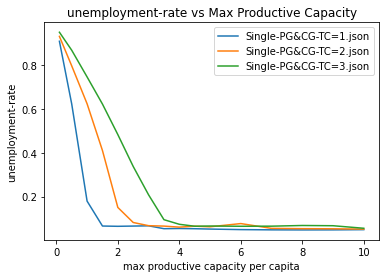

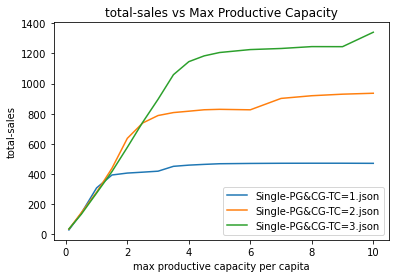

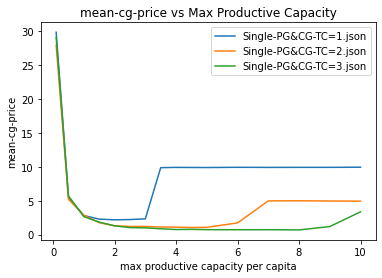

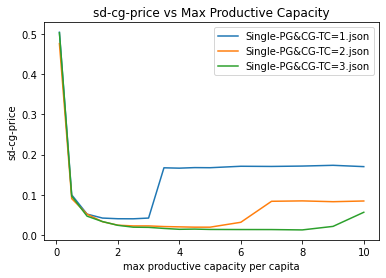

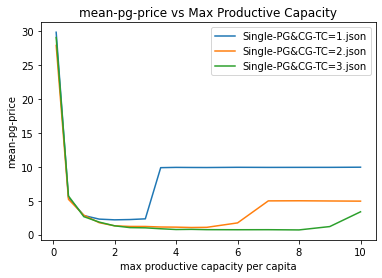

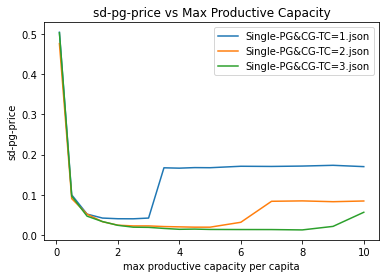

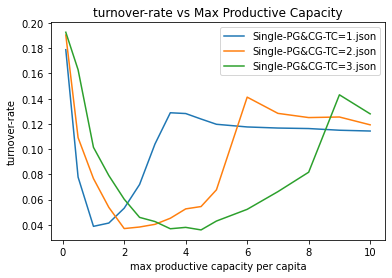

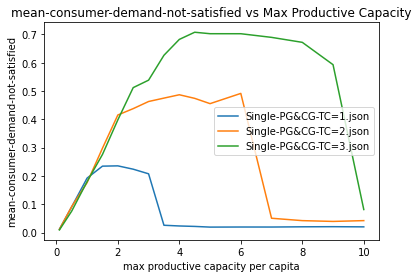

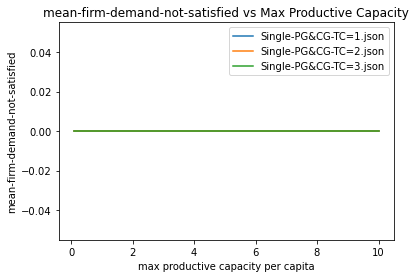

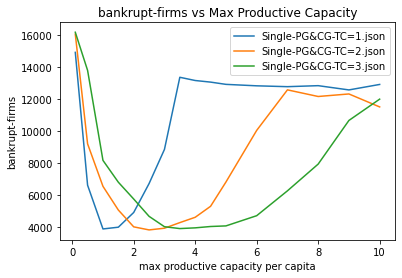

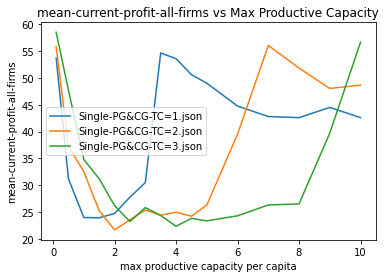

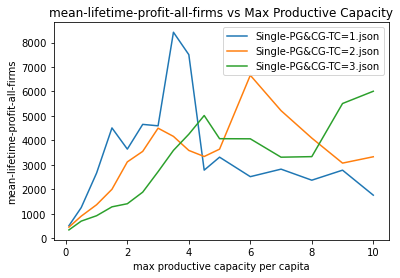

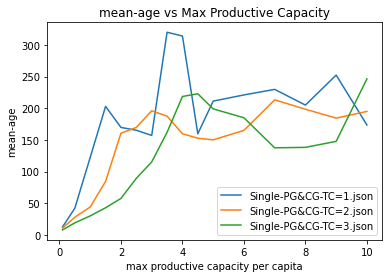

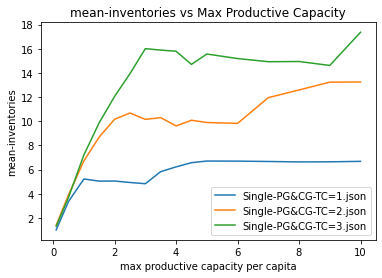

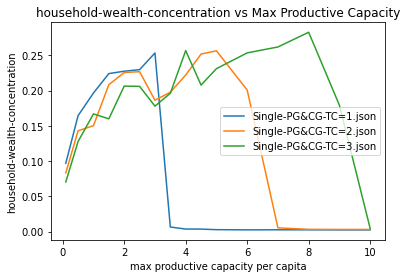

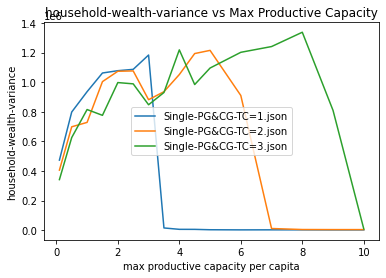

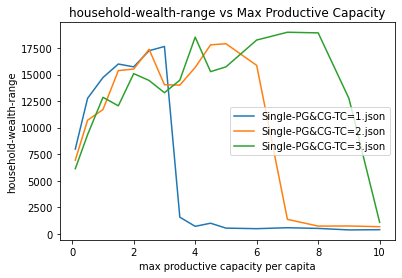

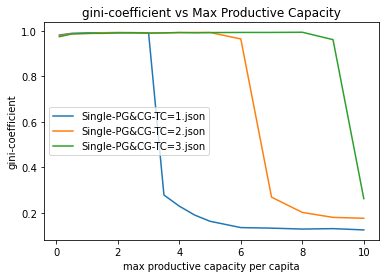

In [46]:

# adf = df[(df['[step]'] >= 2000) & (df['setup-structure']=="Single-PG&CG-TC=2.json")].groupby('max-prod-capacity-per-capita').mean()
adf = df[df['[step]'] >= 2000].groupby(['max-prod-capacity-per-capita', 'setup-structure']).mean().reset_index()
plot_vars_vs_prod_capacity(adf)

In [25]:
# adf2 = df.groupby('max-prod-capacity-per-capita').std()
# plot_vars_vs_prod_capacity(adf2)

### Plot individual trajectory

In [29]:
df1["max-prod-capacity-per-capita"].unique()

array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.6, 8.1, 9.1, 9.6])

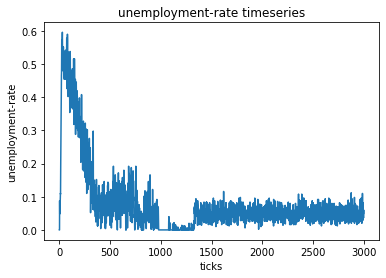

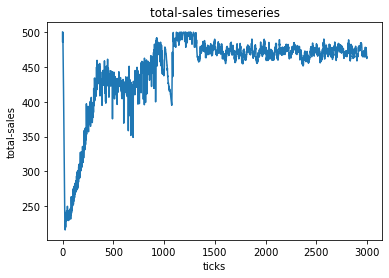

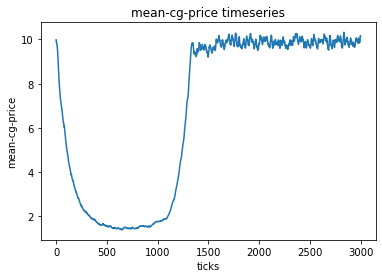

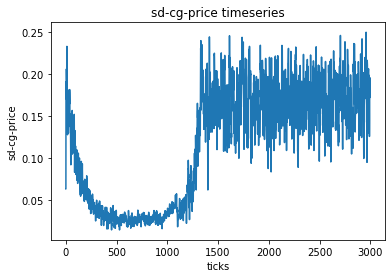

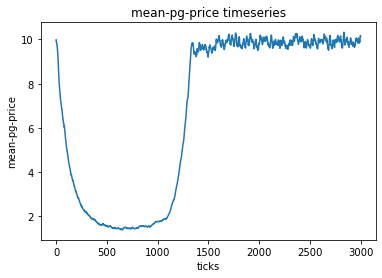

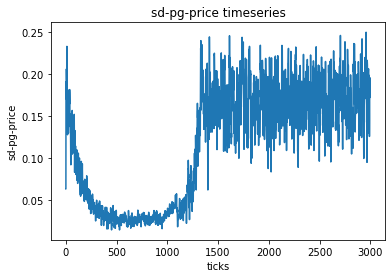

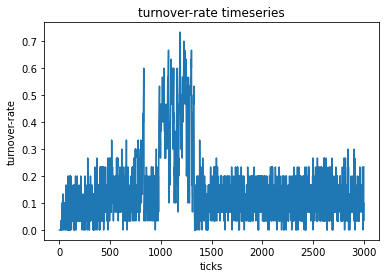

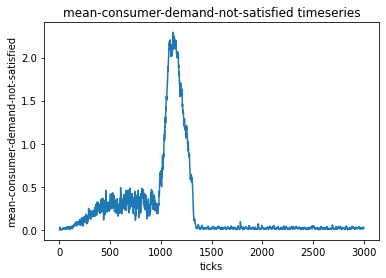

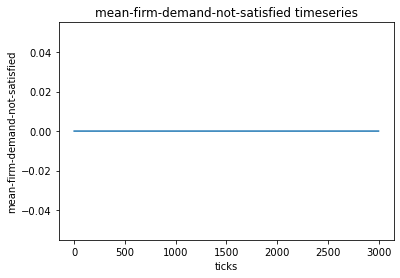

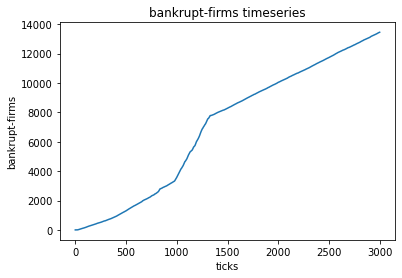

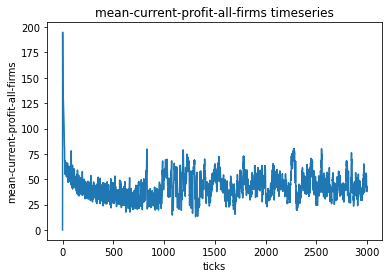

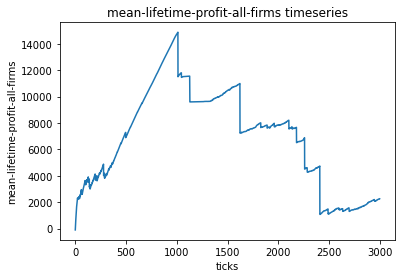

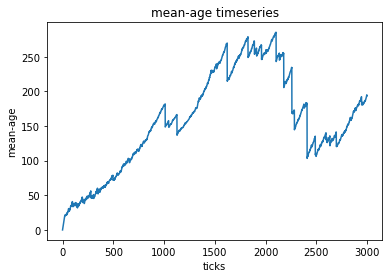

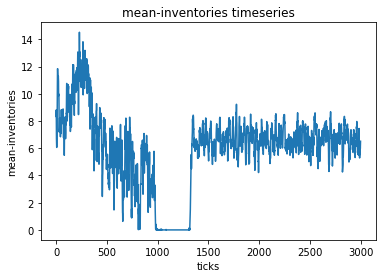

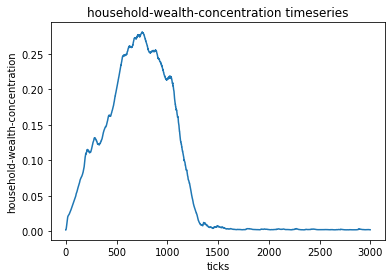

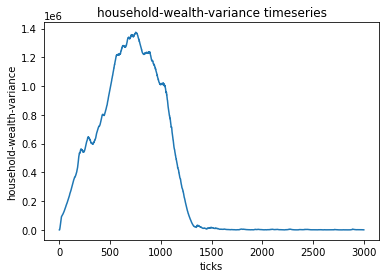

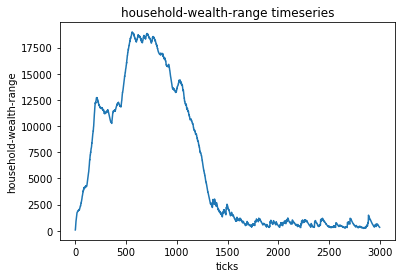

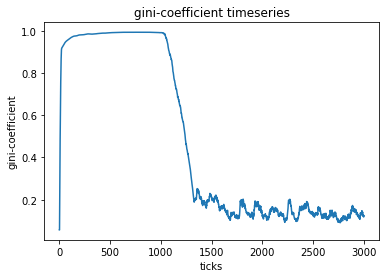

In [44]:
tdf = df1[df1["max-prod-capacity-per-capita"] == 6.1]
plot_var_timeseries(tdf)

## Two-layer PG -> CG

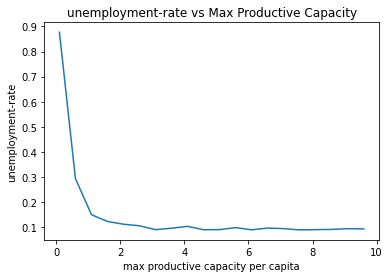

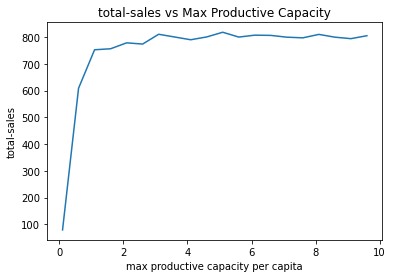

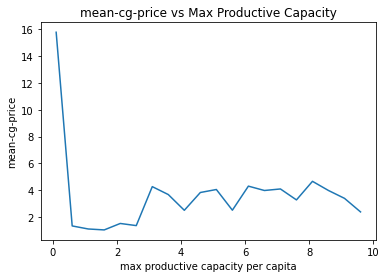

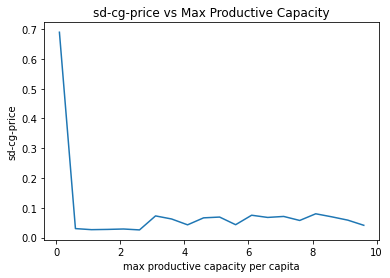

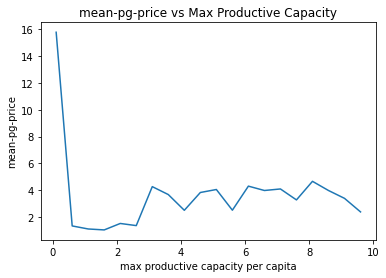

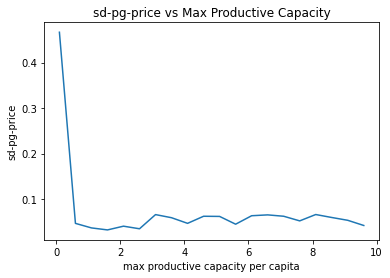

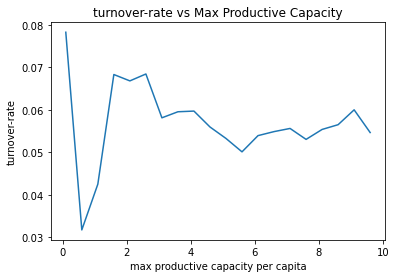

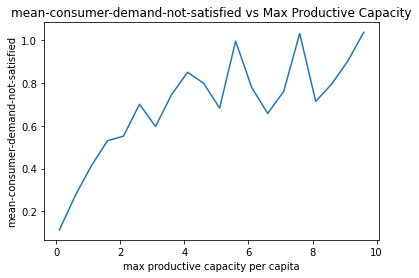

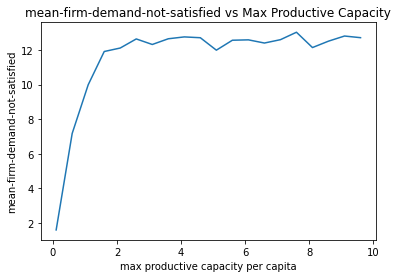

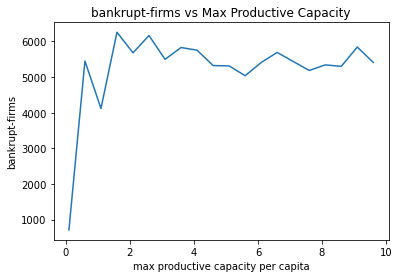

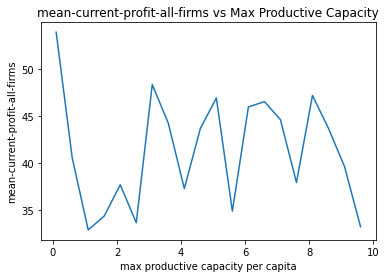

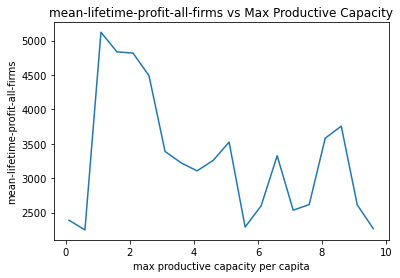

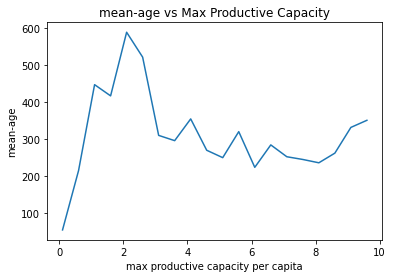

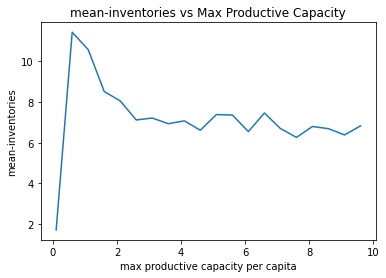

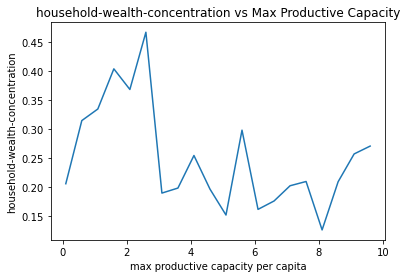

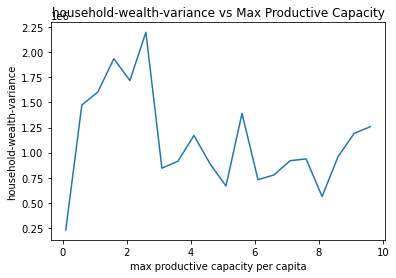

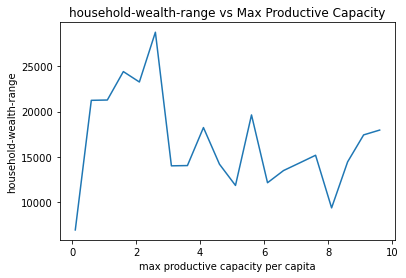

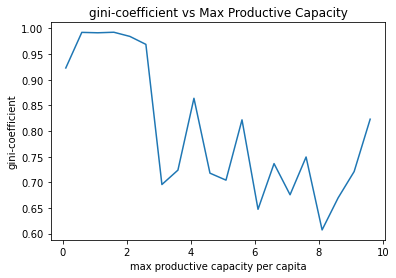

In [32]:
adf = df2.groupby('max-prod-capacity-per-capita').mean()
plot_vars_vs_prod_capacity(adf)

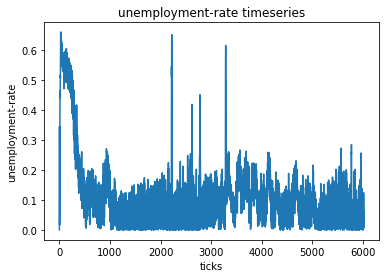

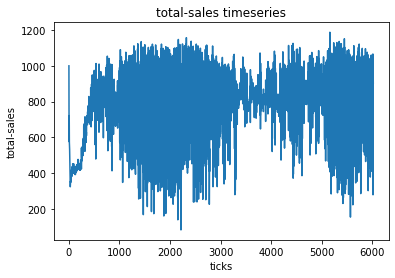

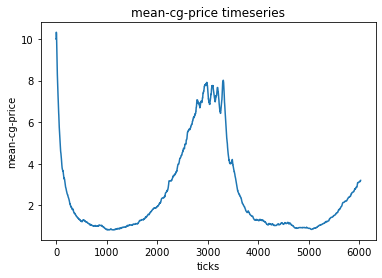

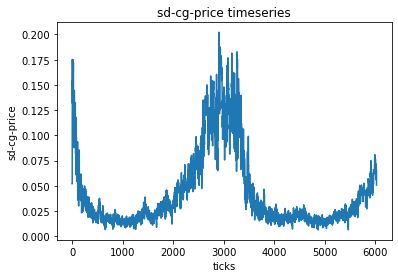

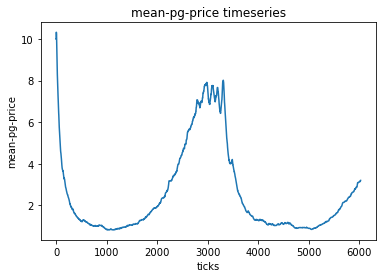

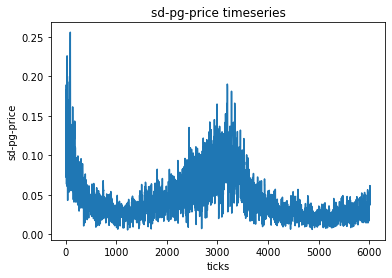

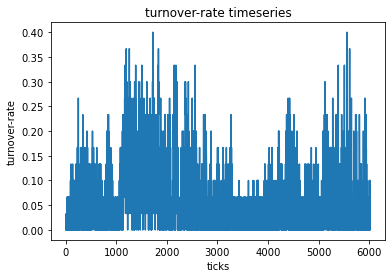

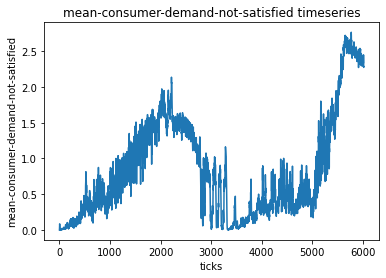

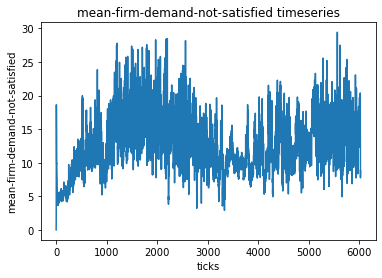

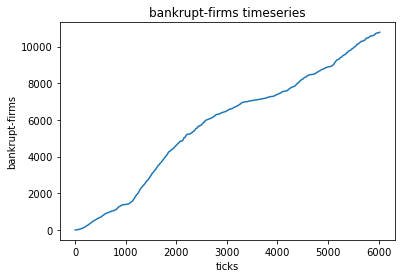

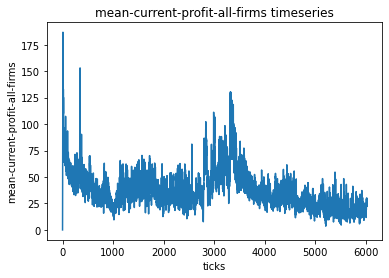

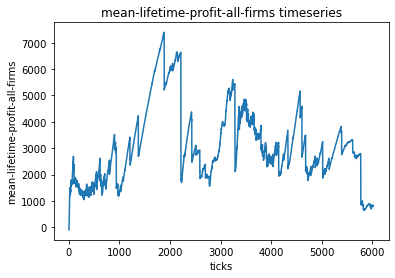

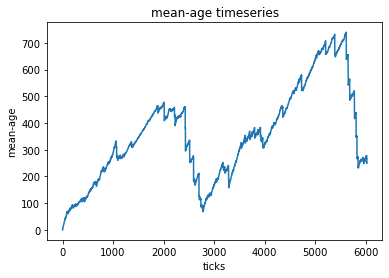

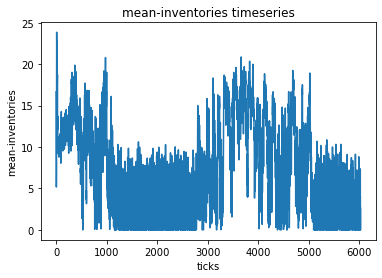

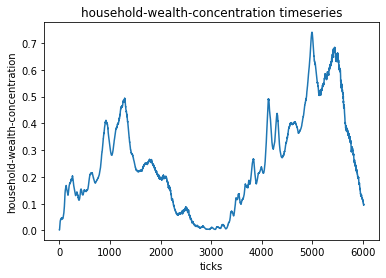

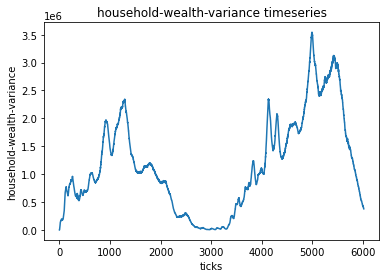

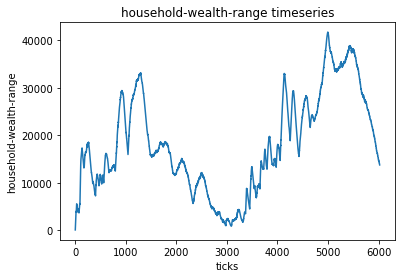

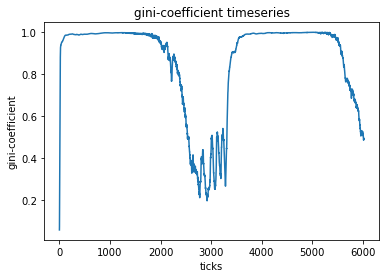

In [43]:
tdf = df2[df2["max-prod-capacity-per-capita"] == 4.1]
plot_var_timeseries(tdf)